In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import entropy
import ast

In [2]:
df = pd.read_csv("evolutionary.csv")
df

,Gen Number,ID,Fitness,Weights,Diversity,Black Line Percentage
0,0,1,0.038058,"[-0.9075348701318955, 0.427041307035708, -0.20...",0.535088,0.0
1,0,2,0.036631,"[-0.6920253084911796, -0.5823079599248215, -0....",0.535088,0.0
2,0,3,0.035679,"[-0.4274488864852577, -0.7342674482619236, 0.6...",0.535088,0.0
3,0,4,0.037982,"[-0.40192531491264205, 0.15290298477104747, 0....",0.535088,0.0
4,0,5,0.042936,"[-0.2149763633527697, -0.3077721576229857, -0....",0.535088,0.0
...,...,...,...,...,...,...
10795,539,8625,0.026898,"[0.36578727037704195, 0.22980593459456505, -0....",0.471140,0.0
10796,539,8626,0.028175,"[0.5482564288393436, 0.10036428112148077, -0.6...",0.471140,0.0
10797,539,8627,0.026197,"[-0.4596458288724107, -0.8759710519610526, 0.2...",0.471140,0.0
10798,539,8628,0.026176,"[-0.47928122595925715, -0.7959998762624044, 0....",0.471140,0.0


In [3]:
def plot_graph(x_values, y_values, title):
    # Optional: set a nice style
    plt.style.use("tableau-colorblind10")  # or 'ggplot', 'bmh', 'fivethirtyeight', etc.

    # Create your figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))  # you can adjust the size

    # Plot something
    ax.plot(x_values, y_values, label='Label', color='blue', marker='o')

    # Add titles and labels
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('X Axis Label', fontsize=12)
    ax.set_ylabel('Y Axis Label', fontsize=12)

    # Grid, legend, etc.
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend()
    ax.tick_params(axis='both', labelsize=10)

    # Optional: annotate points
    # ax.annotate('Note', xy=(x, y), xytext=(x+1, y+1), arrowprops=dict(arrowstyle='->'))

    # Save or show
    plt.tight_layout()
    plt.show()  # Show the plot


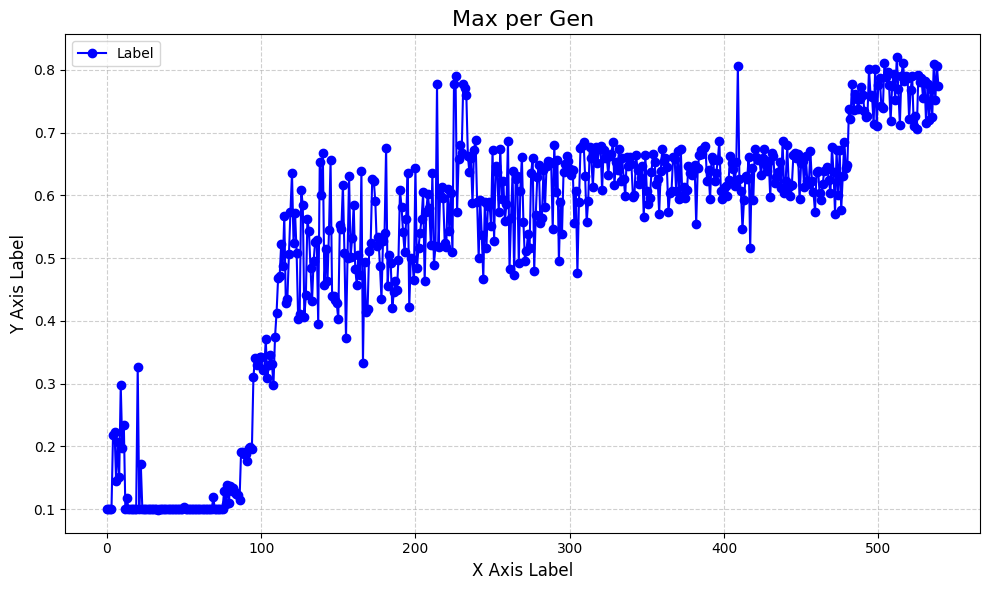

In [4]:
diversity_per_gen = df.groupby("Gen Number")["Fitness"].max().reset_index()

x_values = diversity_per_gen.index
y_values = diversity_per_gen["Fitness"]

plot_graph(x_values, y_values, "Max per Gen")

In [5]:
max_vale = df["Fitness"].max()
df.loc[df["Fitness"] == max_vale]

,Gen Number,ID,Fitness,Weights,Diversity,Black Line Percentage
10241,512,7985,0.820623,"[-0.3478338033699426, -0.9873439689767458, 0.6...",0.584613,0.793986


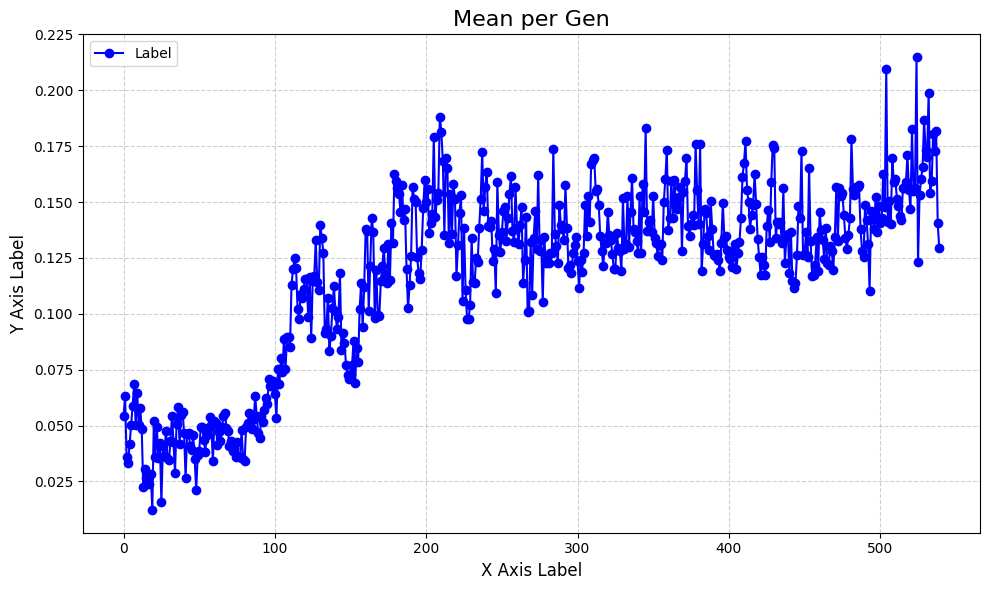

In [6]:
diversity_per_gen = df.groupby("Gen Number")["Fitness"].mean().reset_index()

x_values = diversity_per_gen.index
y_values = diversity_per_gen["Fitness"]

plot_graph(x_values, y_values, "Mean per Gen")

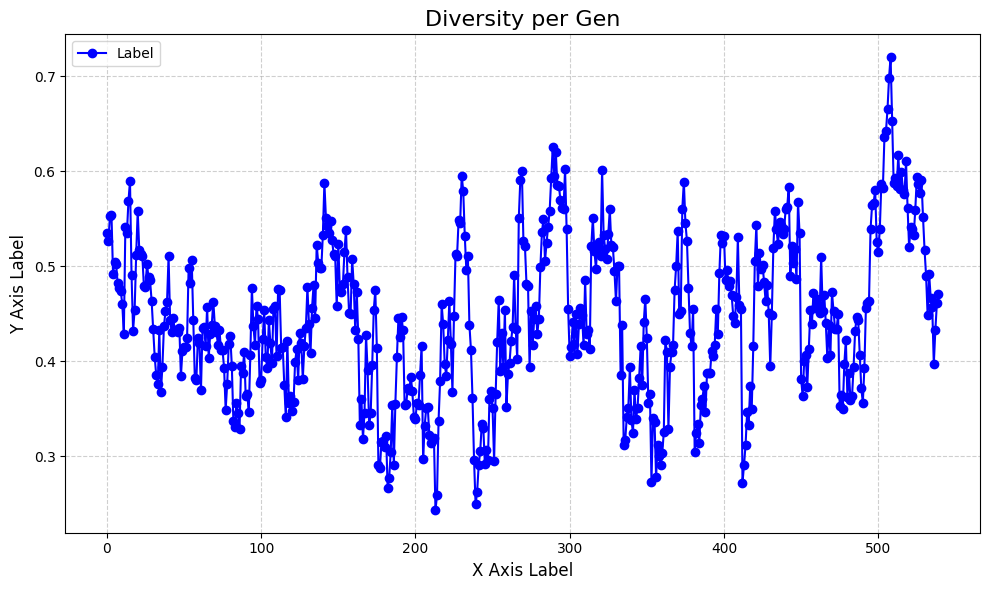

In [7]:
diversity_per_gen = df.groupby("Gen Number")["Diversity"].mean().reset_index()

x_values = diversity_per_gen.index
y_values = diversity_per_gen["Diversity"]

plot_graph(x_values, y_values, "Diversity per Gen")

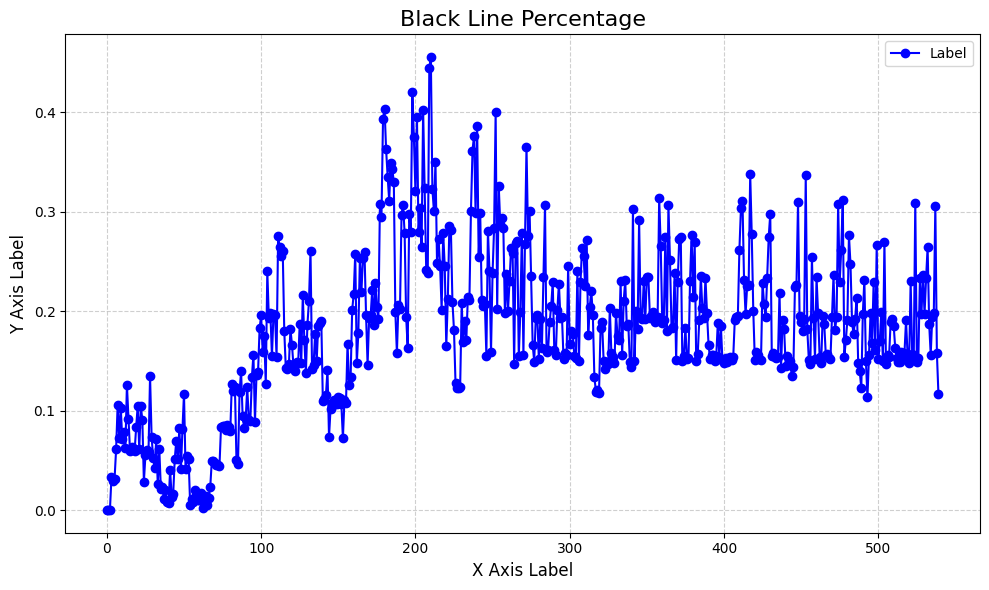

In [8]:
black_area_covered_per_gen = df.groupby("Gen Number")["Black Line Percentage"].mean().reset_index()

x_values = black_area_covered_per_gen.index
y_values = black_area_covered_per_gen["Black Line Percentage"]

plot_graph(x_values, y_values, "Black Line Percentage")

In [9]:
import torch
import torch.nn as nn

SIMPLE_NET_INPUT = 2
SIMPLE_NET_HIDDEN = 4
SIMPLE_NET_OUTPUT = 2

SIMPLE_N_LAYERS = 2

class SimpleNet(torch.nn.Module):
    def __init__(self, layers_sizes):        
        super().__init__() 
        self.layers_sizes = layers_sizes
        self.FC = nn.Sequential(
            nn.Linear(layers_sizes[0]["input"], layers_sizes[0]["ouput"]),
            nn.Tanh(), 
            nn.Linear(layers_sizes[1]["input"], layers_sizes[1]["ouput"]),  
            nn.Tanh()
        )

    def forward(self, x): 
        x = self.FC(x)
        return x.detach().numpy().tolist()
    
    def set_weights(self, weights):
        with torch.no_grad():
            index = 0
            for layer_size in self.layers_sizes:
                connections = []
                for _ in range(layer_size["ouput"]):
                    row = []
                    for _ in range(layer_size["input"]):
                        row.append(weights[index])
                        index += 1
                    connections.append(row)
                bias = []
                for _ in range(layer_size["ouput"]):
                    bias.append(weights[index])
                    index += 1
    
                self.FC[layer_size["n"]].weight.copy_(torch.tensor(connections))
                self.FC[layer_size["n"]].bias.copy_(torch.tensor(bias))

In [10]:
model = SimpleNet([{"input": 2,"ouput": 4, "n": 0}, {"input": 4, "ouput" : 2, "n": 2}])
sample_input = torch.tensor([1, 2], dtype=torch.float32)
output = model(sample_input)

for name, param in model.named_parameters():
    print(name, param.detach().numpy().tolist())


weights = [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1]
model.set_weights(weights)

for name, param in model.named_parameters():
    print(name, param.detach().numpy().tolist())

FC.0.weight [[-0.17436277866363525, 0.7068818211555481], [-0.18573427200317383, 0.05686277151107788], [0.05718415975570679, -0.17309188842773438], [-0.14737069606781006, -0.027667999267578125]]
FC.0.bias [-0.30200517177581787, -0.2870963215827942, -0.1859334111213684, -0.05441021919250488]
FC.2.weight [[0.3739802837371826, -0.21386367082595825, 0.17427265644073486, -0.4702032208442688], [0.18257516622543335, 0.49511420726776123, -0.23632937669754028, 0.0009998679161071777]]
FC.2.bias [0.36432594060897827, -0.33142030239105225]
FC.0.weight [[0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0]]
FC.0.bias [0.0, 1.0, 2.0, 3.0]
FC.2.weight [[0.0, 1.0, 2.0, 3.0], [0.0, 1.0, 2.0, 3.0]]
FC.2.bias [0.0, 1.0]


In [11]:
class Evolutive_Weight:
    def __init__(self, layers_sizes):
        self.layers_sizes = layers_sizes

    def to_list(self, weights):
        def to_list_connections(conections):
            connections_l = []
            for connection_l in conections:
                for connection in connection_l:
                    connections_l.append(connection)
            return connections_l
        result = []
        for layer_w in range(len(weights)):
            result = result + to_list_connections(weights[layer_w]["connections"]) + weights[layer_w]["bias"]
        return result
    
    def to_weight(self, weights_l):
        index = 0
        result = []
        for layer_size in self.layers_sizes:
            connections = []
            for _ in range(layer_size["ouput"]):
                row = []
                for _ in range(layer_size["input"]):
                    row.append(weights_l[index])
                    index += 1
                connections.append(row)
            bias = []
            for _ in range(layer_size["ouput"]):
                bias.append(weights_l[index])
                index += 1
            obj = {"connections": connections,"bias": bias, "n":  layer_size["n"]}
            result.append(obj)
        return result


In [12]:
ws = Evolutive_Weight([{"input": 2,"ouput": 4, "n": 0}, {"input": 4, "ouput" : 2, "n": 2}])
t_l = ws.to_list(weights)
print(t_l)
print(weights)
print(ws.to_weight(t_l))



TypeError: 'int' object is not subscriptable